In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/ivana/Desktop/Python_Kirill'

In [ ]:
#----------------Change the category of the variables (asfactor in R)

In [3]:
movies = pd.read_csv("Movie-Ratings.csv")

In [4]:
len(movies)

559

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [8]:
#rename columns bc they have space
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [10]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [14]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [15]:
#convert year to category (R:factor) as well as film and genre
movies.Film=movies.Film.astype('category')

In [16]:
movies.Genre=movies.Genre.astype('category')
movies.Year=movies.Year.astype('category')

In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [18]:
#get levels
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [19]:
movies.describe() #categorical vaiables are now out

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [20]:
#----------------------------

In [21]:
#Advanced visualization

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [23]:
#joined plot, good way to visualiza bi-variate (2 varibles) distributions

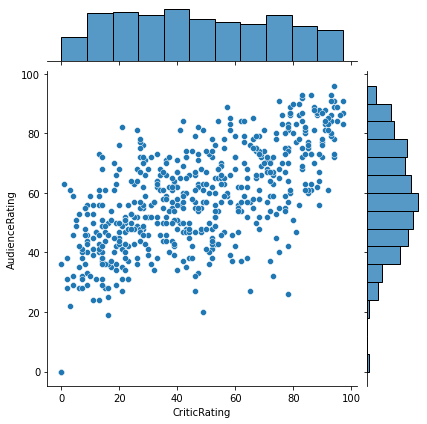

In [24]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

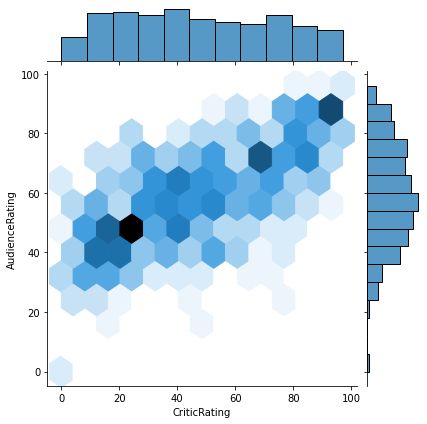

In [25]:
#hexagon is cool because it groups points
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind = 'hex')
#<<<<<<<Chart 1

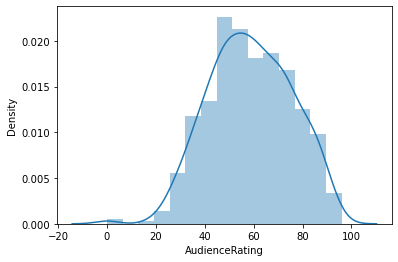

In [26]:
#Histograms
ml = sns.distplot(movies.AudienceRating, bins=15)

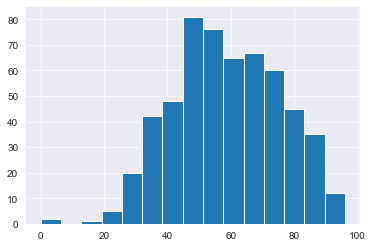

In [28]:
#Histogram just in pyplot
sns.set_style('darkgrid')
n1 = plt.hist(movies.AudienceRating, bins=15)
#normal distribution of audeince rating
#<<<< Chart 2

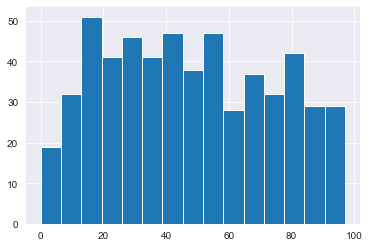

In [29]:
n2 = plt.hist(movies.CriticRating, bins=15)
#when critics according to the criteria are judging movies the normal distribution is list
#<<<<< Chart 3

In [30]:
#----------------------------

In [31]:
#Stacked histogram

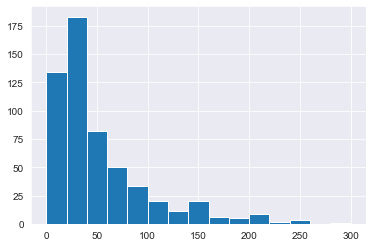

In [32]:
n3 = plt.hist(movies.BudgetMillions, bins=15)

In [35]:
#plot budget in millions only for Drama movies
movies[movies.Genre == 'Drama'].BudgetMillions

10     30
11     20
13      7
18      8
23     20
       ..
529    66
532    38
534    21
541    15
545     2
Name: BudgetMillions, Length: 101, dtype: int64

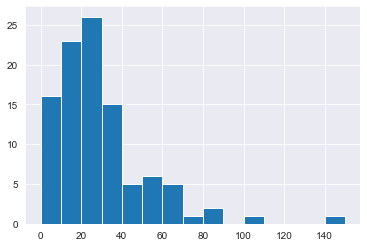

In [36]:
n4 = plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)

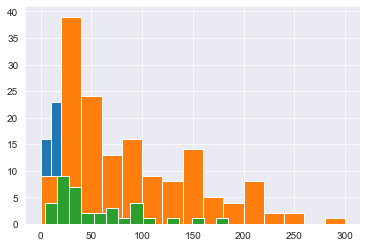

In [39]:
#overlayed histograms
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.show()

(array([[ 4., 14.,  4.,  5.,  2.,  4.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.],
        [13., 53., 28., 18., 18., 13.,  9., 15.,  5.,  5.,  8.,  2.,  2.,
          0.,  1.],
        [52., 94., 39., 24., 20., 14.,  9., 16.,  5.,  5.,  8.,  2.,  2.,
          0.,  1.]]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300.]),
 <a list of 3 BarContainer objects>)

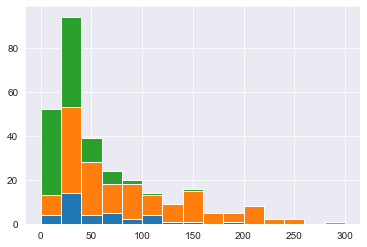

In [42]:
#we want stacked histograms (easier in R)
plt.hist([movies[movies.Genre == 'Thriller'].BudgetMillions, \
         movies[movies.Genre == 'Action'].BudgetMillions,\
         movies[movies.Genre == 'Drama'].BudgetMillions ], \
         bins=15, stacked = True)

In [50]:
#simplify-automate the previous code
#we need to iterate the Genre - variable will be called #gen
#how to access the lis tog Genre - with movies.Genre.cat.categories
for gen in movies.Genre.cat.categories:
    print(gen)
#so we have a loop that iterates over categories
#now we need a list - first we will create an empty list list1=list()
list1=list()
for gen in movies.Genre.cat.categories:
    print(gen)
#then we are going to append to this list (list1.append)  the data
list1=list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
print(list1)


Action
Adventure
Comedy
Drama
Horror
Romance
Thriller
Action
Adventure
Comedy
Drama
Horror
Romance
Thriller
[2       20
5      200
15      35
29      20
30      20
      ... 
531    130
542     35
546    150
547    160
557     24
Name: BudgetMillions, Length: 154, dtype: int64, 1      105
3       18
19     200
21      45
24      40
32      78
46      20
65      38
68     140
130     73
165     12
166    125
167    250
168    150
176     36
178    150
192     70
193     60
241     60
272     37
341     19
363     70
386    130
401    155
459     59
463     25
506     38
540    100
548     60
Name: BudgetMillions, dtype: int64, 0       8
4      20
6      30
8      28
9       8
       ..
552    80
553    22
554    50
555    18
558    80
Name: BudgetMillions, Length: 172, dtype: int64, 10     30
11     20
13      7
18      8
23     20
       ..
529    66
532    38
534    21
541    15
545     2
Name: BudgetMillions, Length: 101, dtype: int64, 7      32
12     35
20     40
28      5
59     2

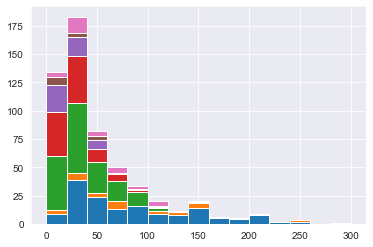

In [49]:
h = plt.hist(list1, bins = 15, stacked = True)

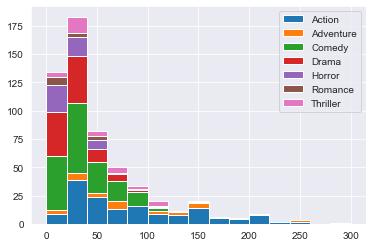

In [53]:
#add a legend
list1=list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
                 
h = plt.hist(list1, bins = 15, stacked = True, label=mylabels)
plt.legend()
plt.show()

In [153]:
#styling

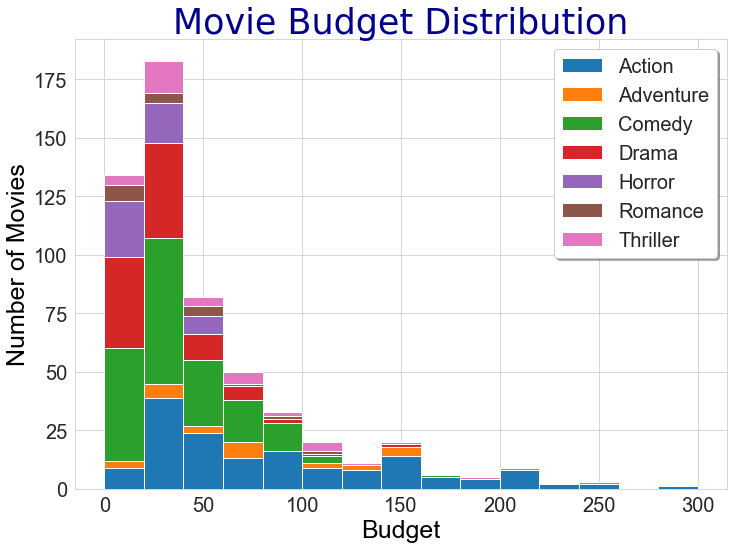

In [166]:
list1=list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

sns.set_style("whitegrid")
#trick - we have created like a dashboard, panel but consisting only of one empty board
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) #size of A4 paper
h = plt.hist(list1, bins = 15, stacked = True, label=mylabels )
#plot title
plt.title("Movie Budget Distribution", fontsize = 35, \
         color = "DarkBlue", fontname="Console")
#x axis label
plt.ylabel("Number of Movies", fontsize = 25, color = "Black")
#y axis label
plt.xlabel("Budget", fontsize = 25, color = "Black")
#tick size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#legend - fontsize and backgrpound
plt.legend(prop={'size':20}, \
          frameon = True, fancybox = True, shadow = True, framealpha = 1)

plt.show()

In [54]:
#-------------------

In [55]:
# Kernel density estimate plot

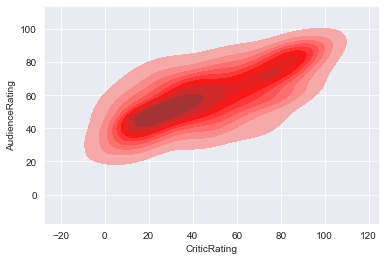

In [68]:
k1 = sns.kdeplot(data=movies, x='CriticRating', y='AudienceRating', \
                 shade=True, shade_lowest=False, color ='Red')

In [71]:
#---------------

In [72]:
#working with subplots

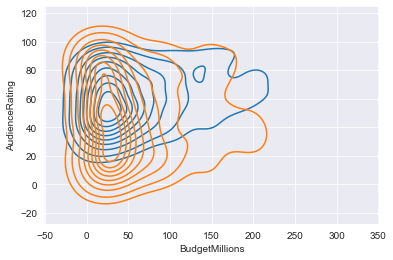

In [78]:
k = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating')
k1 = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating')

[(-20.0, 160.0)]

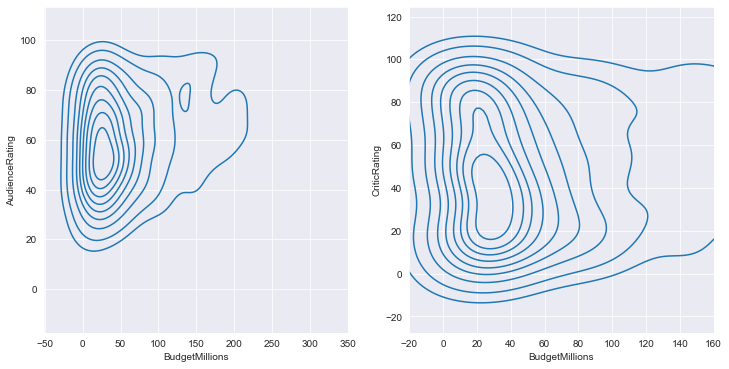

In [81]:
f, axes=plt.subplots(1,2, figsize=(12,6)) # creates two empty charts, you have to be exact
k = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', ax=axes[0])
k1 = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', ax=axes[1])
#for more than 2 specify ax= axes[0,1]
k1.set(xlim=(-20,160))

[(-50.0, 350.0)]

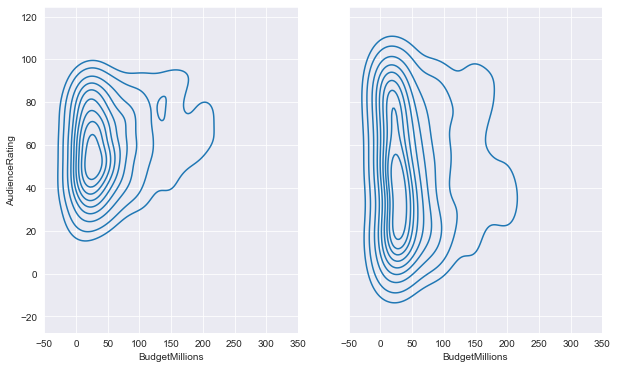

In [85]:
#promjeniti limits
f, axes=plt.subplots(1,2, figsize=(10,6), sharex=True, sharey=True) 
k = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', ax=axes[0])
k1 = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', ax=axes[1])
k1.set(xlim=(-50,350))

In [86]:
#---------------------

In [87]:
#Violinplots and boxplots

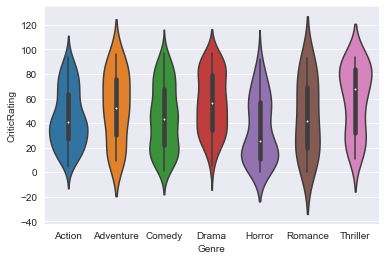

In [90]:
z = sns.violinplot(data=movies, x = 'Genre', y = 'CriticRating')

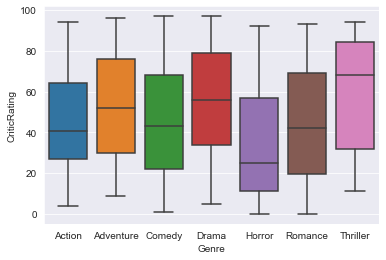

In [91]:
#smaller box = more data
box = sns.boxplot(data=movies, x = 'Genre', y = 'CriticRating')

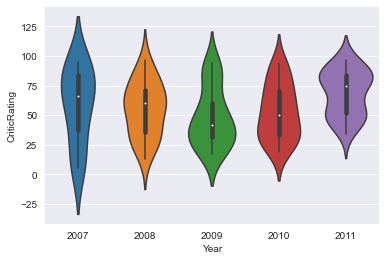

In [93]:
z = sns.violinplot(data=movies[movies.Genre=='Drama'], x = 'Year', y = 'CriticRating')

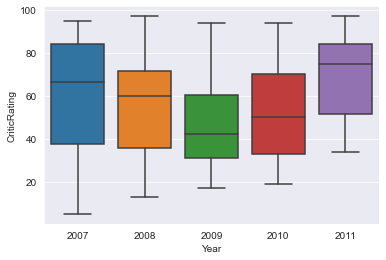

In [94]:
box = sns.boxplot(data=movies[movies.Genre=='Drama'], x = 'Year', y = 'CriticRating')

In [95]:
#--------------------------

In [96]:
#Create facet grid

In [115]:
#g = sns.FacetGrid(movies, row='Genre', hue = 'Genre') 
#g = sns.FacetGrid(movies, col='Year', hue = 'Genre') 

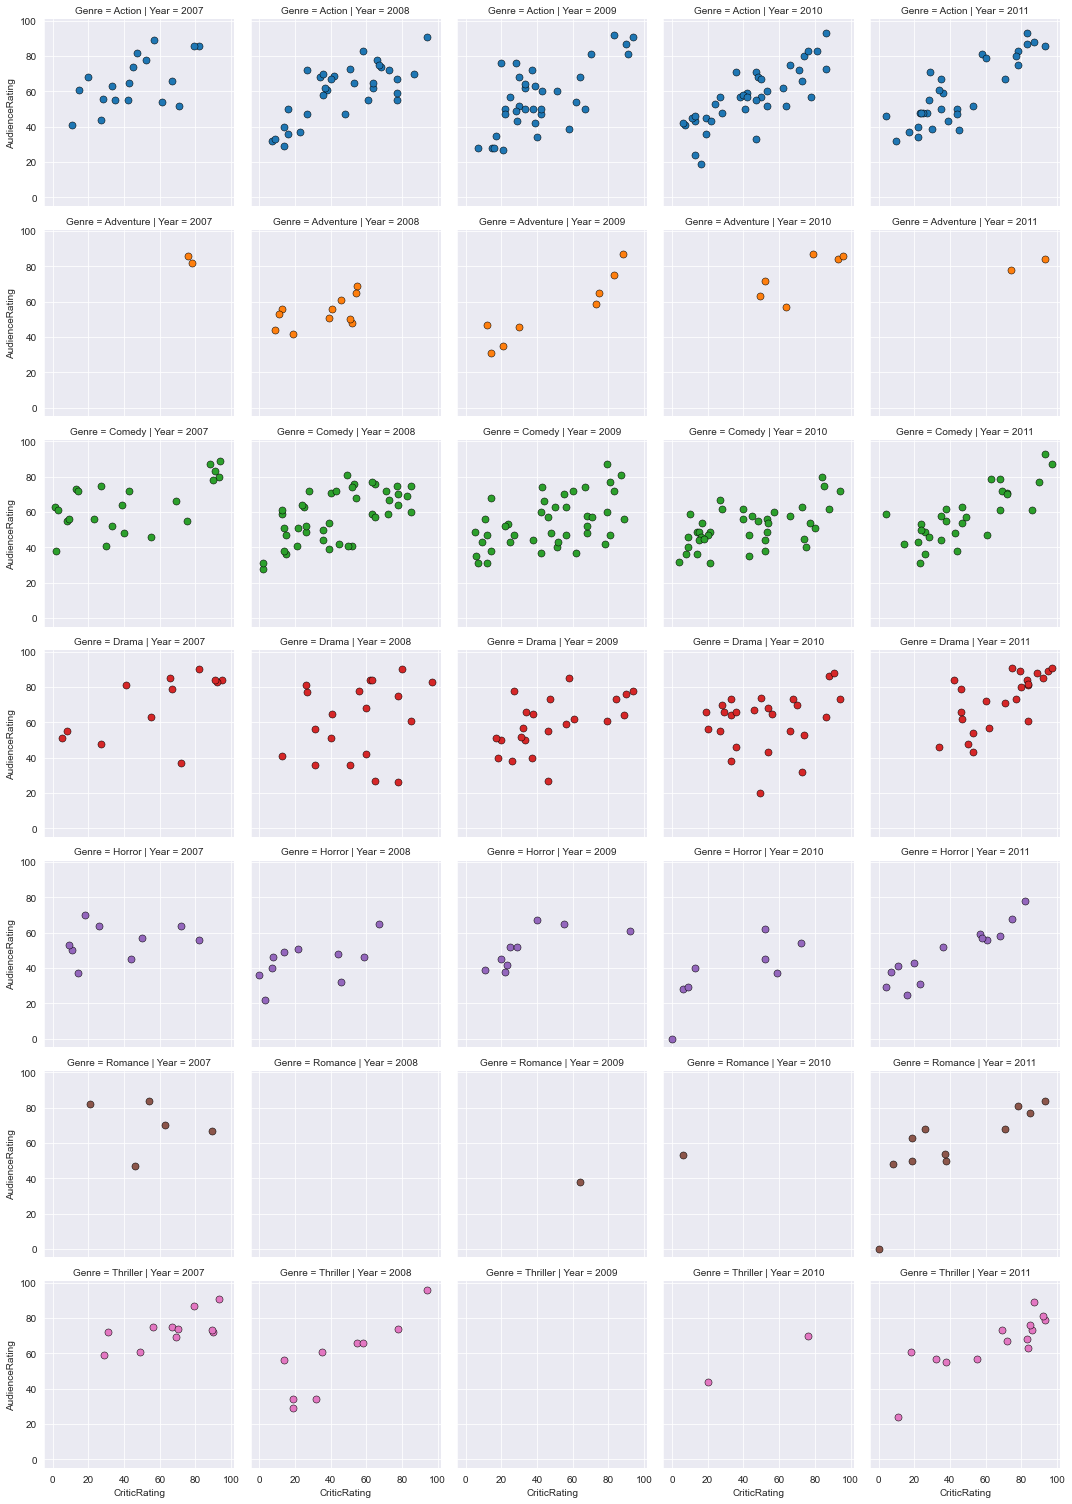

In [120]:
#populate the grid, crate a scatterplot that is split over these grids
g = sns.FacetGrid(movies, row='Genre', col='Year', hue = 'Genre') 
kws = dict(s=50, linewidth = 0.5, edgecolor = 'black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)


In [117]:
#h = sns.FacetGrid(movies, row = 'Genre', col='Year', hue = 'Genre') 
#h = h.map(plt.hist, data=movies, x='BudgetMillions')

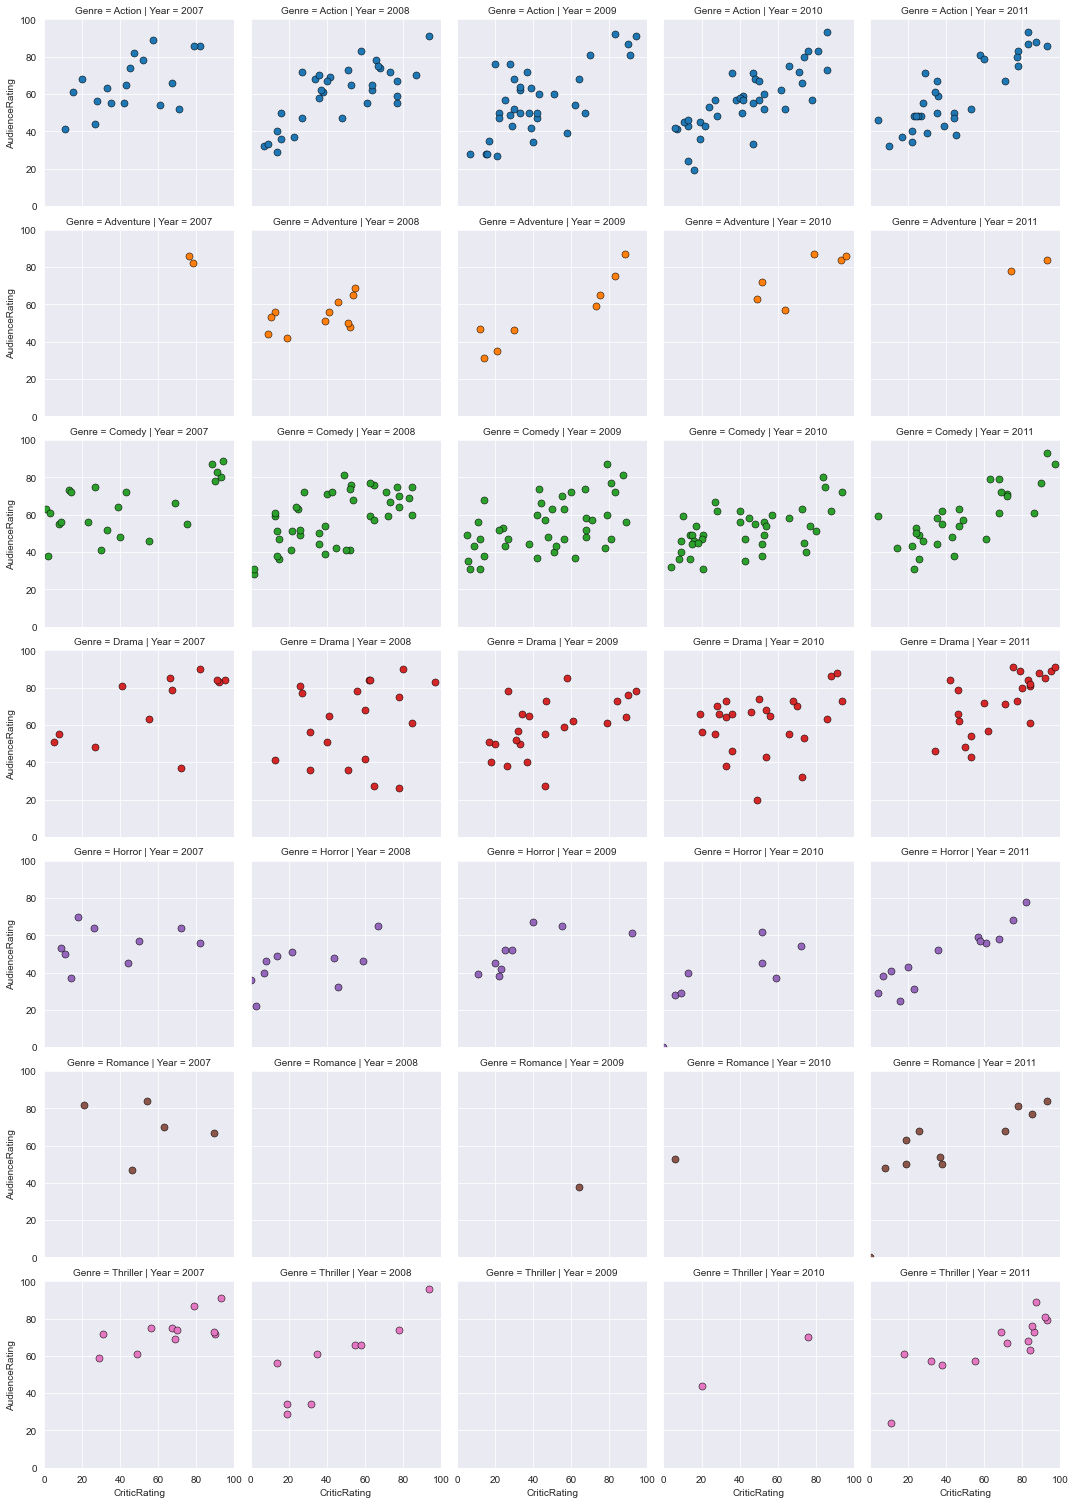

In [121]:
#controlling axes and creating diagonals
g = sns.FacetGrid(movies, row='Genre', col='Year', hue = 'Genre') 
kws = dict(s=50, linewidth = 0.5, edgecolor = 'black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))

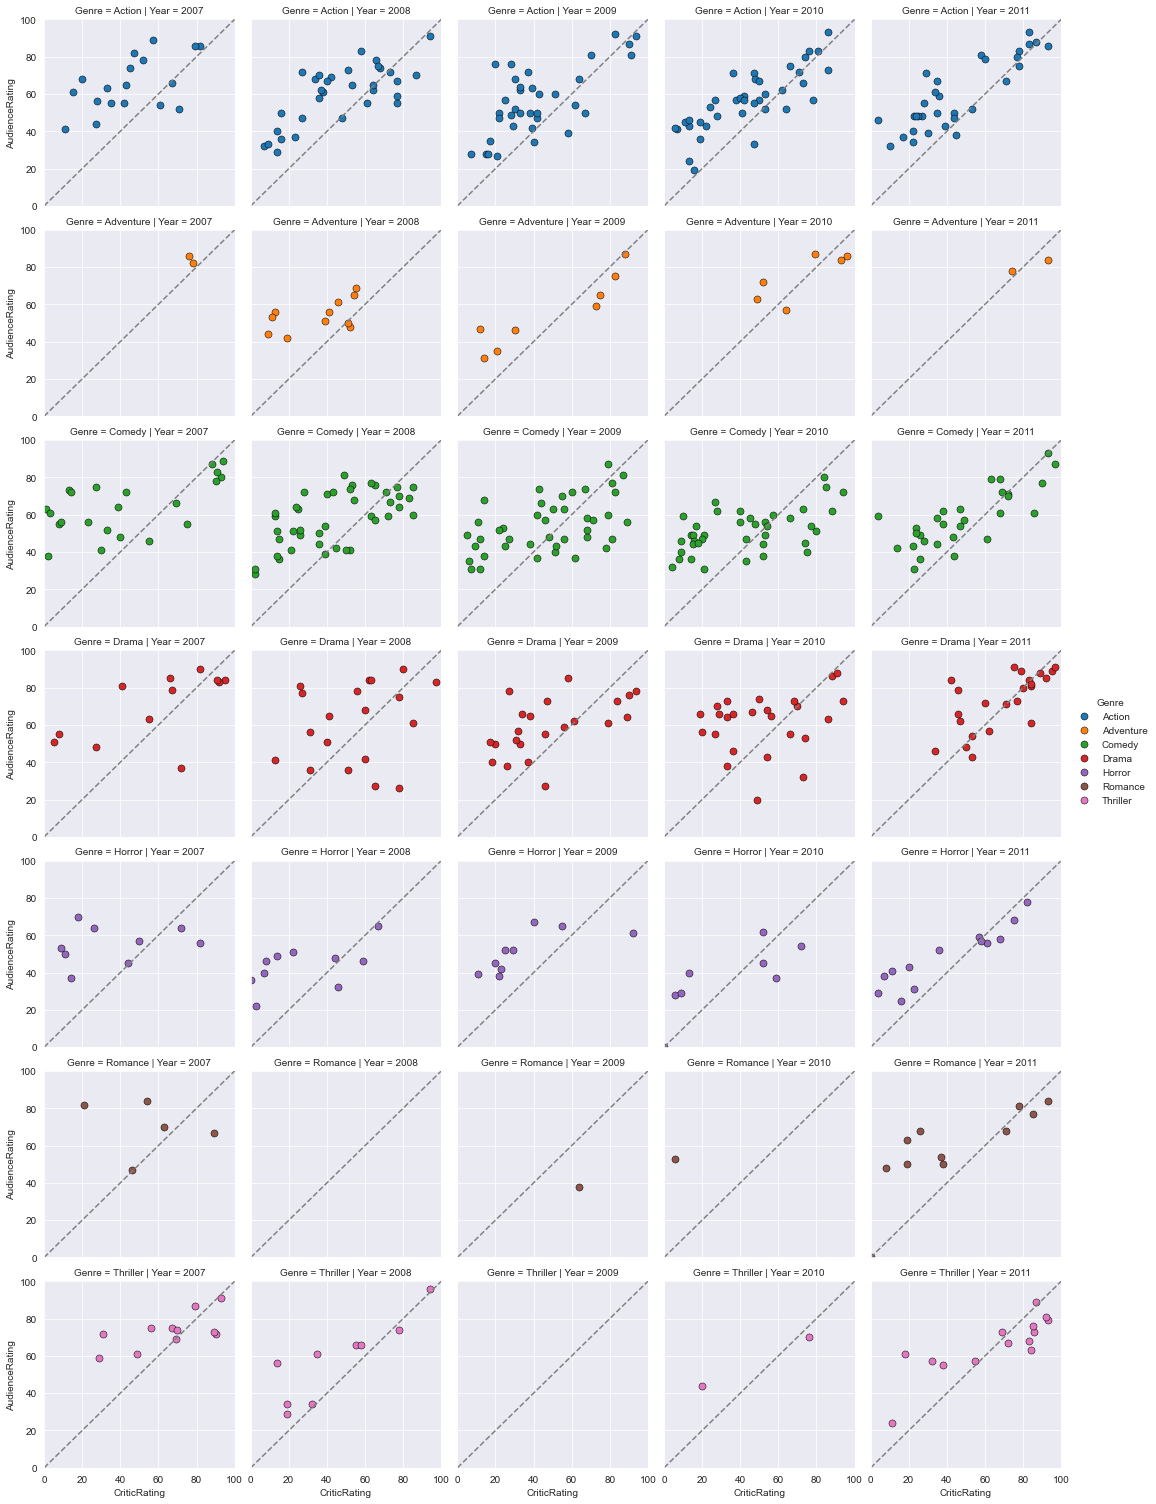

In [124]:
#for diagonals - have to iterate + add legend
g = sns.FacetGrid(movies, row='Genre', col='Year', hue = 'Genre') 
kws = dict(s=50, linewidth = 0.5, edgecolor = 'black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c= 'gray', ls="--")
g.add_legend()
#<<<<<<<<Chart 5

In [125]:
#------------------

In [126]:
#Building dashboards

In [127]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

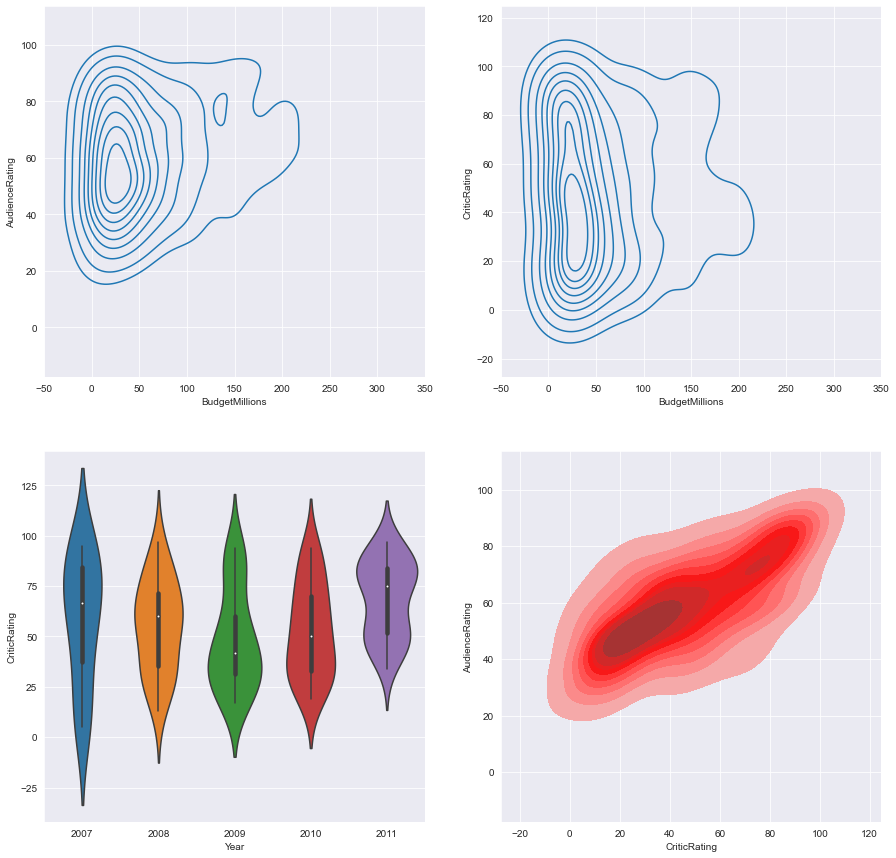

In [133]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2, 2, figsize=(15,15))
k = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', ax=axes[0,0])
k1 = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', ax=axes[0,1])
k1.set(xlim=(-50,350))
k.set(xlim=(-50,350))
z = sns.violinplot(data=movies[movies.Genre=='Drama'], x = 'Year', y = 'CriticRating', \
                   ax=axes[1,0])
k2 = sns.kdeplot(data=movies, x='CriticRating', y='AudienceRating', \
                 shade=True, shade_lowest=False, color ='Red', ax=axes[1,1])
plt.show()

(array([19., 32., 51., 41., 46., 41., 47., 38., 47., 28., 37., 32., 42.,
        29., 29.]),
 array([ 0.        ,  6.46666667, 12.93333333, 19.4       , 25.86666667,
        32.33333333, 38.8       , 45.26666667, 51.73333333, 58.2       ,
        64.66666667, 71.13333333, 77.6       , 84.06666667, 90.53333333,
        97.        ]),
 <BarContainer object of 15 artists>)

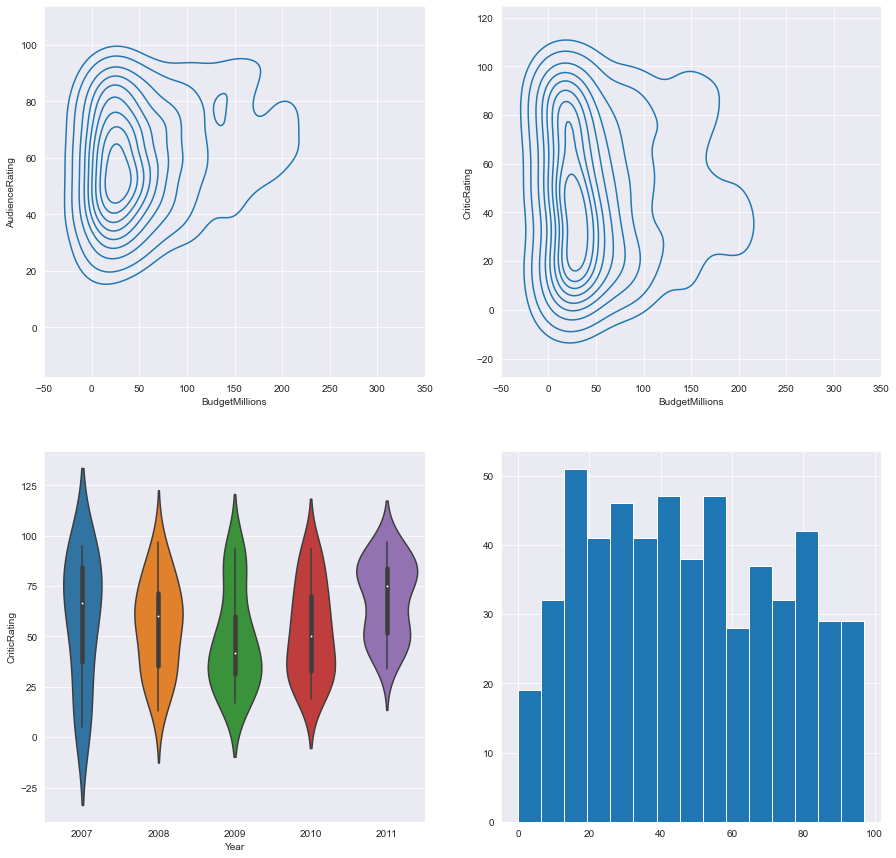

In [134]:
#add a not-seaborn plot
sns.set_style("darkgrid")
f, axes = plt.subplots(2, 2, figsize=(15,15))
k = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', ax=axes[0,0])
k1 = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', ax=axes[0,1])
k1.set(xlim=(-50,350))
k.set(xlim=(-50,350))
z = sns.violinplot(data=movies[movies.Genre=='Drama'], x = 'Year', y = 'CriticRating', \
                   ax=axes[1,0])
axes[1,1].hist(movies.CriticRating, bins=15)

In [144]:
#cmaps in seaborn, like 
#k = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', \
                shade=True, shade_lowest = True, cmap = 'Bluess', \
                ax=axes[0,0])
#Bluess' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


IndentationError: unexpected indent (<ipython-input-144-715834c1f6b2>, line 3)

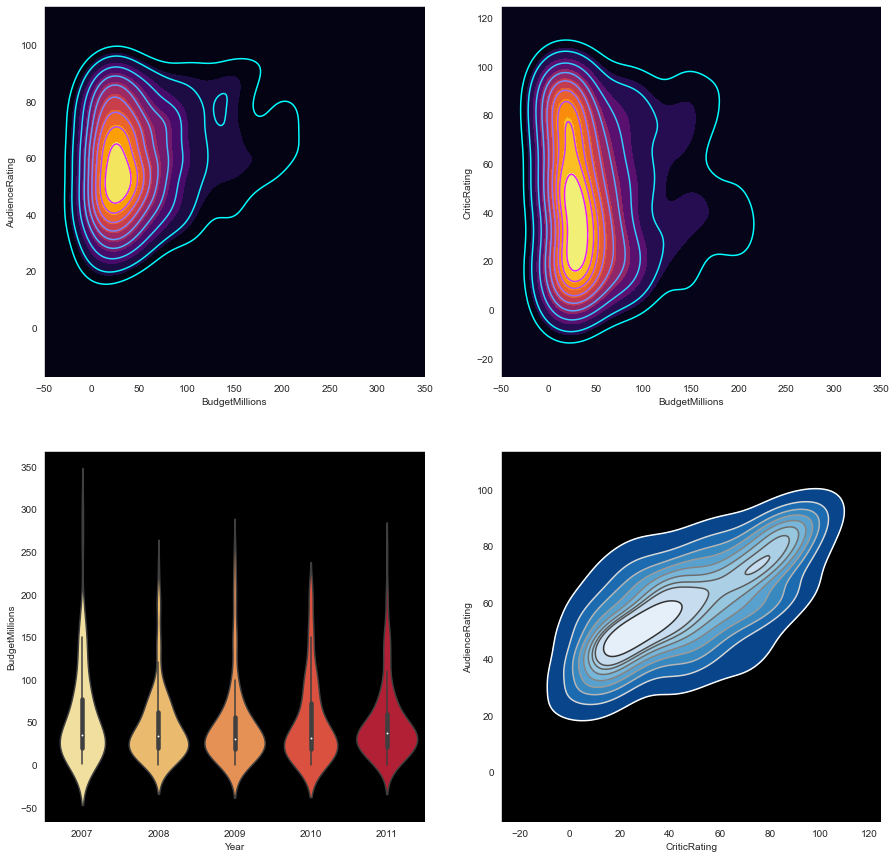

In [152]:
#Styling
sns.set_style("dark", {"axes.facecolor": "black"}) #now the background is black
f, axes = plt.subplots(2, 2, figsize=(15,15))
#plot [0,0]
k = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', \
                shade=True, shade_lowest = True, cmap = 'inferno', \
                ax=axes[0,0])
k.outline = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', \
                cmap = 'cool', ax=axes[0,0])
#plot [0,1]
k1 = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', \
                 shade=True, shade_lowest = True, cmap = 'inferno', \
                 ax=axes[0,1])

k1.outline = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', \
                cmap = 'cool', ax=axes[0,1])

k1.set(xlim=(-50,350))
k.set(xlim=(-50,350))

#plot [1,0]
z = sns.violinplot(data=movies, x = 'Year', y = 'BudgetMillions', \
                   palette = 'YlOrRd', ax=axes[1,0])

#plot [1,1]
k2 = sns.kdeplot(data=movies, x='CriticRating', y='AudienceRating', \
                 shade=True, shade_lowest=False, cmap ='Blues_r', ax=axes[1,1])

k2.outline = sns.kdeplot(data=movies, x='CriticRating', y='AudienceRating', \
                 cmap ='gist_gray_r', ax=axes[1,1])
